<h2><center> Evaluating the effect on marine biodiversity of Marine Protected Areas (MPAs) worldwide: </center></h2>

<h3><center> Presentation on Ocean Biodiversity Information System (OBIS) MPA Project </center></h3>
<center>Abby Benson, Rene Francolini, Natalie Posdaljian, Natalie Low, Kyle Oliveira, Camille Ross, Sam McNeely, Nick Record, Camille Ross, Angel Segura, Ben Tupper </center>

![MPA](MPA.png)

<b> OBIS </b>
OBIS is a global open-access data and information clearing-house on marine biodiversity for science, conservation and sustainable development

<b> MPAs </b>
Conserved waters for a number of reasons including economic resources, biodiversity conservation, and species protection

<b> Standardized Species Diversity: ES50 </b>
Hurlbert's index, or ES50, is the expected number of distinct species in a random sample of 50 observations; it is a bias-indepenent indicator on marine biodiversity richness. It has the ability to somewhat correct for sampling bias.

In [1]:
# install all libraries needed

library(sf)
library(robis)
library(tidyverse)
library(ggplot2)
library(rnaturalearth)
library(RColorBrewer)
library(rnaturalearthdata)
library(vegan)



Linking to GEOS 3.8.1, GDAL 3.1.2, PROJ 7.1.0

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



### Download MPA polygons from NOAA

How to download NOAA MPAs

In [ ]:
#### How to download NOAA MPAs, not to be run during presentation ####
## Refer to mpa_poly.Rmd & get_mpa_poly.R

### Choose MPA polygon(s) of interest

Given the MPA of interest, extract data from OBIS within the MPA

In [2]:
# OBIS request function occurrence() in robis requires a text-formatted 
# geometry input this is a simple helper function to convert a standard 
# polygon shapefile into a suitable text-formatted geometry

extract_polygon_geometry <- function(polygon) {
  polygon %>%
    st_geometry(.) %>%
    st_as_text(.) %>%
    return(.)
}

In [3]:
# Load sample polygons - California MPA file
# Can replace this with global polygons when those are available

ca_mpa_polygons <- st_read("shapefiles/california_mpas/ca_all_mpas.geojson")


# subset a couple of MPA polygons

# Soquel Canyon is a little more offshore
soquel_canyon_smca <- ca_mpa_polygons %>% filter(MPA_NAME == "Soquel Canyon SMCA")

# Point Lobos is more coastal but an older MPA
point_lobos_smca <-ca_mpa_polygons %>% filter(MPA_NAME == "Point Lobos SMCA")

Reading layer `ca_all_mpas' from data source `/home/jovyan/ohw20-proj-species-marine-protected-areas/shapefiles/california_mpas/ca_all_mpas.geojson' using driver `GeoJSON'
Simple feature collection with 155 features and 14 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -124.5326 ymin: 32.53284 xmax: -117.1238 ymax: 42.00004
geographic CRS: WGS 84


### Get all species in MPA(s) from OBIS

In [4]:
## pull all OBIS records for two California MPAs ##

soquel_canyon_records <- occurrence(geometry = extract_polygon_geometry(soquel_canyon_smca))
point_lobos_records <- occurrence(geometry = extract_polygon_geometry(point_lobos_smca))

Retrieved 5000 records of approximately 6477 (77%)
Retrieved 6477 records of approximately 6477 (100%)
Retrieved 1600 records of approximately 1600 (100%)


In [5]:
# take a quick look at both MPAs
head(soquel_canyon_records)
dim(soquel_canyon_records)

head(point_lobos_records)
dim(point_lobos_records)

brackish,date_year,references,scientificNameID,scientificName,coordinateUncertaintyInMeters,absence,individualCount,dropped,aphiaID,⋯,parvorder,parvorderid,organismID,category,organismQuantity,organismQuantityType,infrakingdomid,subkingdom,infrakingdom,subkingdomid
<lgl>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
TRUE,2003,https://www.ncei.noaa.gov/erddap/tabledap/deep_sea_corals.csv?ShallowFlag%2CDatasetID%2CCatalogNumber%2CSampleID%2CCitation%2CRepository%2CScientificName%2CVern [...],urn:lsid:marinespecies.org:taxname:558,Porifera,500m,FALSE,1,FALSE,558,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FALSE,2000,NA,urn:lsid:marinespecies.org:taxname:124713,Psolus squamatus,NA,FALSE,NA,FALSE,124713,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,1991,http://calcofi.org/publications/calcofireports/v57/Vol57-Sakuma_pages.163-183.pdf,urn:lsid:marinespecies.org:taxname:1128,Euphausiacea,NA,FALSE,7150,FALSE,1128,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,2007,https://www.ncei.noaa.gov/erddap/tabledap/deep_sea_corals.csv?ShallowFlag%2CDatasetID%2CCatalogNumber%2CSampleID%2CCitation%2CRepository%2CScientificName%2CVern [...],urn:lsid:marinespecies.org:taxname:125267,Holaxonia,50m,FALSE,3,FALSE,125267,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FALSE,2002,https://www.ncei.noaa.gov/erddap/tabledap/deep_sea_corals.csv?ShallowFlag%2CDatasetID%2CCatalogNumber%2CSampleID%2CCitation%2CRepository%2CScientificName%2CVern [...],urn:lsid:marinespecies.org:taxname:132046,Polymastia,500m,FALSE,2,FALSE,132046,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,2000,NA,urn:lsid:marinespecies.org:taxname:135392,Nanomia,NA,FALSE,NA,FALSE,135392,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 6477  148

brackish,date_year,references,scientificNameID,scientificName,coordinateUncertaintyInMeters,absence,individualCount,dropped,aphiaID,⋯,island,verbatimLocality,collectionID,islandGroup,typeStatus,georeferenceVerificationStatus,verbatimDepth,accessRights,subgenus,subgenusid
<lgl>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<int>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
TRUE,2007,https://www.ncei.noaa.gov/erddap/tabledap/deep_sea_corals.csv?ShallowFlag%2CDatasetID%2CCatalogNumber%2CSampleID%2CCitation%2CRepository%2CScientificName%2CVern [...],urn:lsid:marinespecies.org:taxname:558,Porifera,50m,FALSE,9,FALSE,558,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FALSE,NA,NA,urn:lsid:marinespecies.org:taxname:274838,Sebastes proriger,NA,FALSE,NA,FALSE,274838,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,2000,NA,urn:lsid:marinespecies.org:taxname:123081,Crinoidea,NA,FALSE,NA,FALSE,123081,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TRUE,2007,https://www.ncei.noaa.gov/erddap/tabledap/deep_sea_corals.csv?ShallowFlag%2CDatasetID%2CCatalogNumber%2CSampleID%2CCitation%2CRepository%2CScientificName%2CVern [...],urn:lsid:marinespecies.org:taxname:558,Porifera,50m,FALSE,2,FALSE,558,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FALSE,2007,https://www.ncei.noaa.gov/erddap/tabledap/deep_sea_corals.csv?ShallowFlag%2CDatasetID%2CCatalogNumber%2CSampleID%2CCitation%2CRepository%2CScientificName%2CVern [...],urn:lsid:marinespecies.org:taxname:132016,Poecillastra,50m,FALSE,1,FALSE,132016,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,2000,NA,urn:lsid:marinespecies.org:taxname:123081,Crinoidea,NA,FALSE,NA,FALSE,123081,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 1600  137

### Compute ES50

In [6]:
# Natalie P, calculate ES50.
# Also can do before and after ES50 (one day, maybe, not today)

#convert individual counts from character to numeric
#soquel_canyon_records
soquel_canyon_records$individualCount <- as.numeric(soquel_canyon_records$individualCount)
#convert NANs to 1
soquel_canyon_records$individualCount[is.na(soquel_canyon_records$individualCount)] <- 1 
soquel_canyon_records$Count <- 1 * soquel_canyon_records$individualCount

#point_lobos_records
point_lobos_records$individualCount <- as.numeric(point_lobos_records$individualCount)
#convert NANs to 1
point_lobos_records$individualCount[is.na(point_lobos_records$individualCount)] <- 1 
point_lobos_records$Count <- 1 * point_lobos_records$individualCount


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [7]:
#calculate the number of unique species in each MPA
#soquel_canyon_records
SpeciesCount_SoquelCanyon <- aggregate(soquel_canyon_records$Count, 
                                       by=list(Category=soquel_canyon_records$scientificName),
                                       FUN=sum)

#point_lobos_records
SpeciesCount_PointLobos <- aggregate(point_lobos_records$Count, 
                                     by=list(Category=point_lobos_records$scientificName),
                                     FUN=sum)
#visualize species counts
SpeciesCount_SoquelCanyon
SpeciesCount_PointLobos


Category,x
<chr>,<dbl>
Acanthoptilum,268
Actiniaria,10
Actinopterygii,11
Aegina,41
Aglaophenia struthionides,3
Agonidae,4
Alcidae,4
Alcyonacea,20
Anarrhichthys ocellatus,2


Category,x
<chr>,<dbl>
Actiniaria,5
Actinopterygii,2
Aegina,1
Alcyonacea,4
Amphiophiura superba,5
Amphiura (Amphiura) diomedeae,2
Anelassorhynchus abyssalis,2
Asteroidea,4
Asteronyx loveni,1


In [9]:
#calculate the ES50 value
#Hurlbert's index, or ES50, is the expected number of distinct species 
#in a random sample of 50 observations; it is a bias-indepenent indicator 
#on marine biodiversity richness. It has the ability to somewhat correct for sampling bias.
#0-20: low, 30-50: high

ES50_SoquelCanyon = rarefy(SpeciesCount_SoquelCanyon$x,50) 
ES50_PointLobos = rarefy(SpeciesCount_PointLobos$x,50) 

ES50_SoquelCanyon
ES50_PointLobos

[1] 2.878146
attr(,"Subsample")
[1] 50

[1] 12.2153
attr(,"Subsample")
[1] 50

### Retrieve taxonomic group  & Environmental Data of interest

We are going to focus on the Soquel Canyon MPA, which can be seen here:

![map](CalMap.jpg)

In [10]:
#Working with genus Sebastes (rockfish)

EnvironmentalMetricPresent <- function(polygon, taxa, metric) {
    
    #obtain occurrences of taxa of interest within the polygon of interest
    taxaPresence <- occurrence(geometry = polygon, taxa)
    
    #create dataframe of the environmental data as well as the lat/lon of the sighting
    environmentalMetricDF <- data.frame(EnvironmentalData = taxaPresence[metric], 
                                   longitude = taxaPresence$decimalLongitude, 
                                   latitude = taxaPresence$decimalLatitude, 
                                   date = taxaPresence$eventDate)
    
    return(environmentalMetricDF)
}

In [11]:
##Run above function to get Sebastes data within the Soquel Canyon

Sebastes_SoquelCanyon <- EnvironmentalMetricPresent(extract_polygon_geometry(soquel_canyon_smca), 
                                           "Sebastes", 
                                           "sst")
head(Sebastes_SoquelCanyon)
dim(Sebastes_SoquelCanyon)
names(Sebastes_SoquelCanyon)


Retrieved 183 records of approximately 183 (100%)


,sst,longitude,latitude,date
,<dbl>,<dbl>,<dbl>,<fct>
1,12.78,-121.9688,36.83320,2009-05-21T05:12:46Z
2,12.78,-121.9765,36.83096,2000-02-10T21:24:00Z
3,12.75,-121.9790,36.84930,2011-05-21T10:06:00Z
4,12.78,-121.9467,36.81833,NA
5,12.75,-121.9817,36.84500,2000-05-12T04:02:00Z
6,12.75,-121.9853,36.84600,2013-05-11T04:04:53Z


[1] 183   4

[1] "sst"       "longitude" "latitude"  "date"

In [12]:
## Get range of sst values for Sebastes sightings

rangeValue <- range(Sebastes_SoquelCanyon$sst)
rangeValue

[1] 12.73 12.78

### Visualize Environmental Data from OBIS

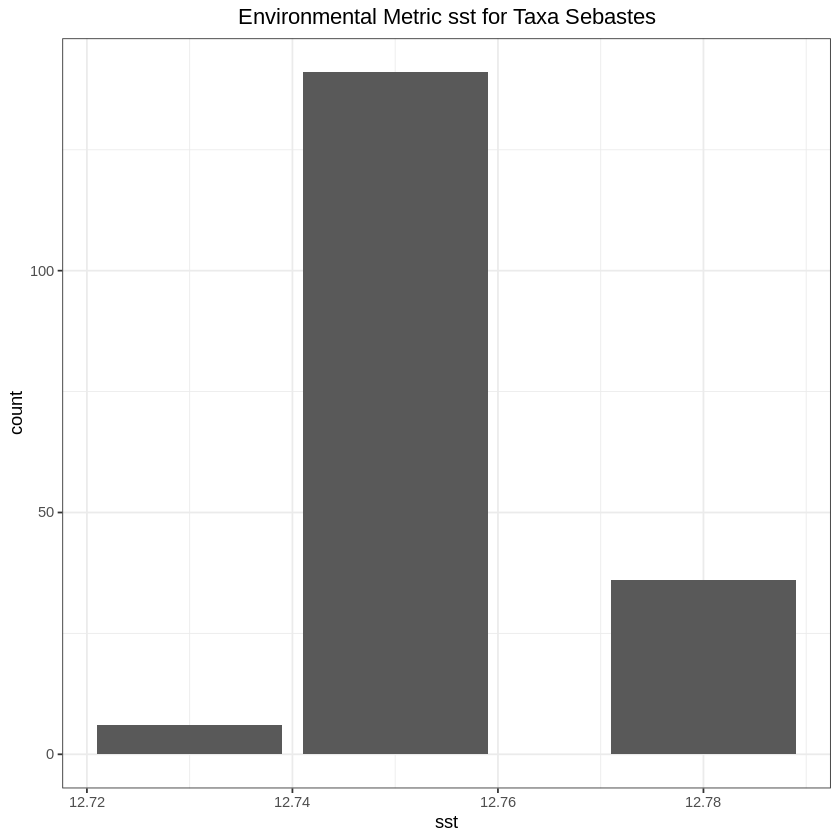

In [13]:
#input: environmental dataframe, taxa, and metric of interest
#output: histogram of metric values

GraphEnvironmentalMetric <- function(inputDF, taxa, metric) {    
    
EnvironmentalHistogram <- 
    ggplot(inputDF, aes_string(x = metric)) +
    geom_bar(stat = "count") +
    theme_bw() +
    labs(title = paste("Environmental Metric", metric, "for Taxa", taxa)) +
    theme(plot.title = element_text(hjust = 0.5))
    
   return(EnvironmentalHistogram)

}

SebastesSST <- GraphEnvironmentalMetric(Sebastes_SoquelCanyon, "Sebastes", "sst")

SebastesSST

### Map taxa Sightings with associated Environmental Factor

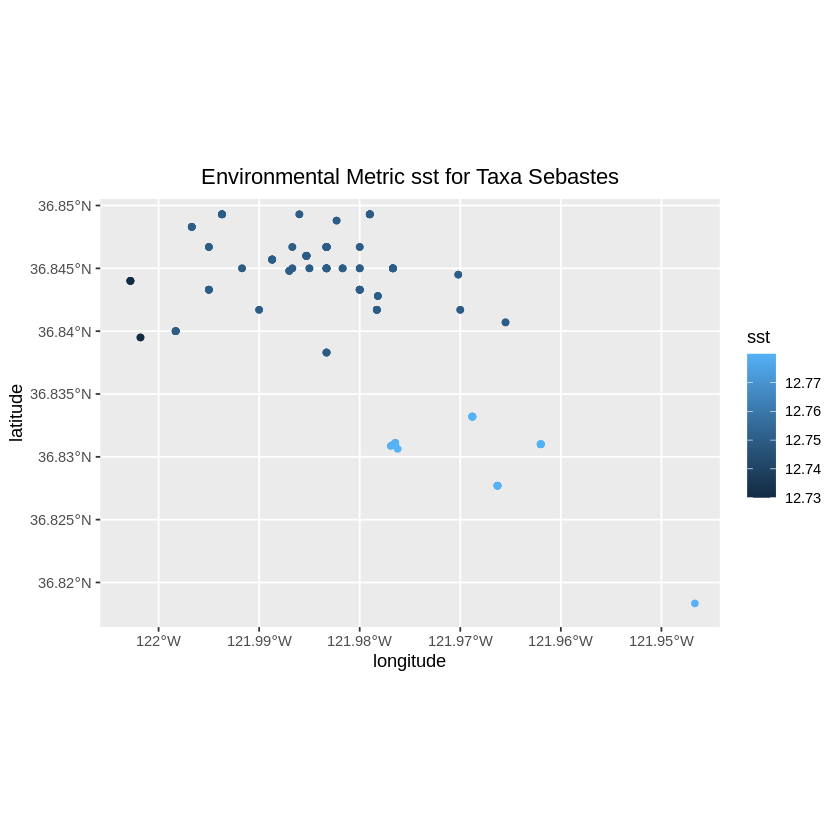

In [14]:
#input: environmental dataframe, taxa, and metric of interest
#output: map of location and metric values

MapEnvironmentalMetric <- function(inputdataframe, taxa, metric) {

minLon <- round(min(inputdataframe$longitude), 3)
minLat <- round(min(inputdataframe$latitude), 3) 
maxLon <- round(max(inputdataframe$longitude), 3) 
maxLat <- round(max(inputdataframe$latitude), 3) 
    
world <- ne_countries(scale = "medium", returnclass = "sf")

MetricMap <- 
    ggplot(data=world)+
    geom_sf() +
    geom_point(data = inputdataframe, aes_string(x = "longitude", y = "latitude", color = metric)) +
    coord_sf(xlim = c(minLon, maxLon), ylim = c(minLat, maxLat), expand = TRUE) +
    labs(title = paste("Environmental Metric", metric, "for Taxa", taxa)) +
    theme(plot.title = element_text(hjust = 0.5))
    
    return(MetricMap)
}

SebastesMAP <- MapEnvironmentalMetric(Sebastes_SoquelCanyon, "Sebastes", "sst")

SebastesMAP